![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# **SOLUTIONS** - D3FC0N Capture The Flag - [LB 0.894]
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/ctf-title.png)
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)

## Intro

Help Henry Hacker get to Homecoming! In this series of challenges, you'll be interacting with various machine learning challenges. You're welcome to use this notebook as a template, but can also use any other resources. `Submission Helper` code is just there to show you how to interact with a challenge. You're encouraged to write your own code. There are no fake flags, so if you're returned a 256 character-long string, you found it! Collect those flags, add them next to their corresponding challenge in `solution.csv` (provided) and submit them to the scoreboard. We've provided an `add_flag()` function to help with this. There's no limit to how many times you try the challenges, but you can only submit `solution.csv` to the scoreboard 50 times per day. 

CTF's are inherently puzzles that are intended to challenge you and help you learn new things. Sometimes they may be a little ambiguous or misleading. That's part of the challenge! However, if you feel like a challenge or piece of infrastructure isn't working correctly, contact the organizers through the Kaggle discussion board or the discord channel.

In [1]:
# We're just importing some stuff to make sure the challenges and helper code works.
# Feel free to import anything else you need (or solve in a different language), but if you overwrite these, provided code may not work.

import pandas as pd
import numpy as np
import os
import requests
from IPython.display import Image as Ima
from IPython.display import clear_output, display
from PIL import Image as Im
from torch.utils.data import Dataset, DataLoader
import torch
import joblib
import matplotlib.pyplot as plt
import json
import base64
import shutil
import warnings
warnings.filterwarnings("ignore")


dir_name = "/kaggle/input/ai-village-ctf"

# Input data files are available in the read-only "../input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# A helper function for tracking flags. You could do it yourself, but why?

def add_flag(challenge_id: str, flag: str) -> str:
    try:
        submission_path = "/kaggle/working/submission.csv"
        template_path = f"{dir_name}/submission.csv"
        if not os.path.isfile(submission_path) :
            shutil.copyfile(template_path, submission_path)
        flags = pd.read_csv(submission_path, index_col="challenge_id")
        valid = flags.index.to_list()
        if challenge_id in valid:
            flags.at[challenge_id] = flag
            flags.to_csv(submission_path)
            print("Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day")
        else:
            print("Invalid challenge_id")
    except:
        print("We had trouble saving that flag. Keep a copy of it and contact the CTF organizers.")

![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# HOTDOG (id: hotdog) -- 200 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

This is Chester. He's heard of Hotdog/Not Hotdog, but really wants to be classified as a hot-dog (get it?).

### Objective

Help Chester classify as a hotdog.

## SOLUTION
At first I tried modifying the provided image of Chester to make him look like a hotdog. For example, I added a bun and added mustard. When that didn't work, I just downloaded an image of a hotdog from the internet and submitted it. To my surprise and happiness, that worked!

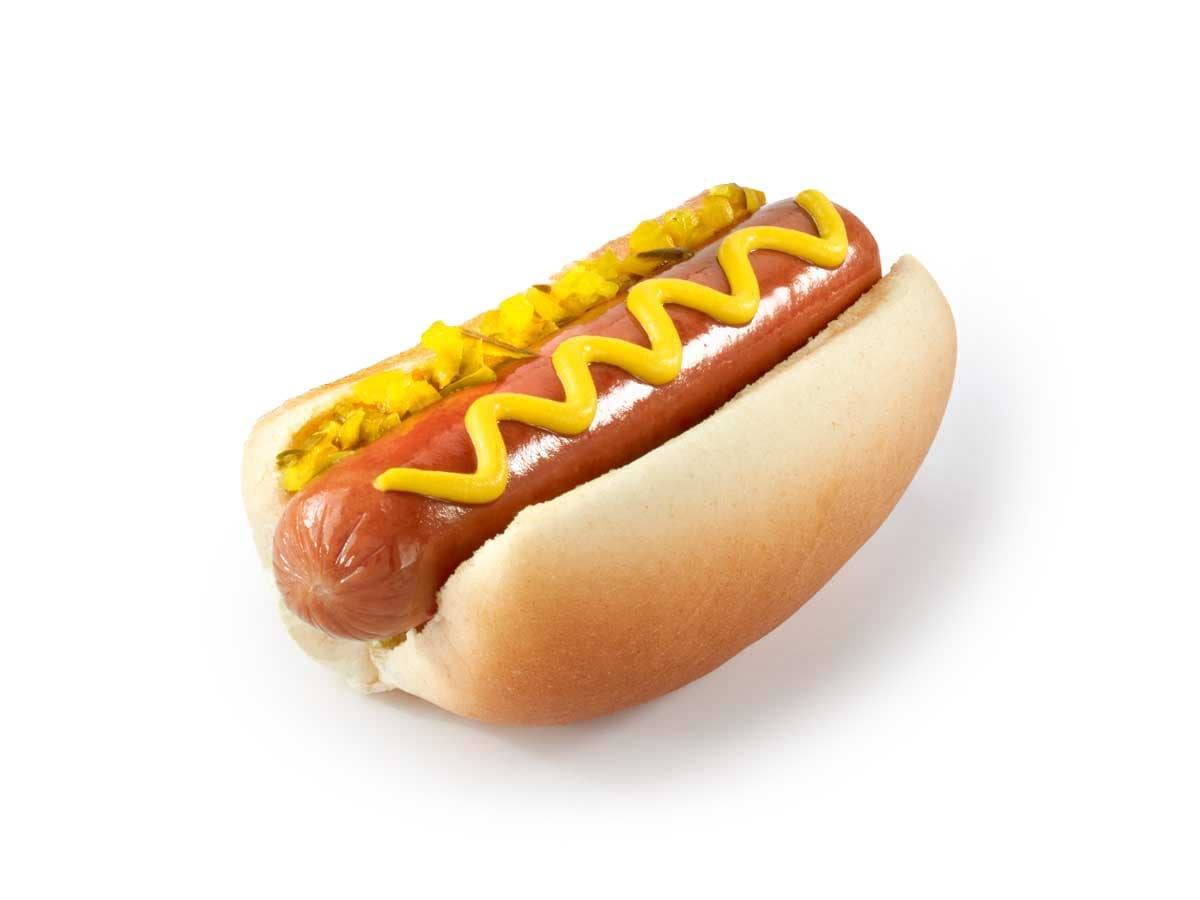

In [3]:
Ima(filename=f'../input/d3fc0nctfdataset/hotdog.jpeg')

In [4]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"../input/d3fc0nctfdataset/hotdog.jpeg")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = json.loads(r.text)['message']

{"message": "OUOJXUFZ8G5U92}Z6T8C2JE6FURFFG07BMAOAVK9NLACVS0745VHFTFHDPCC41RS5JEUO6BT6RG9YH2QKB2DFO8CBBWVBXGZILLAT5E4I2D4G5O2LAFWUGLHSI9{YAYD"}


In [5]:
add_flag("hotdog", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Math

This series of "Math" challenges is designed to introduce the concepts of dimensionality.

Data is often represented in a high dimensional space, but is actually several intrinsically low dimensional components that can be diagnosed. Intrinsic low-dimensionailty is incredibly important to machine learning because many ML algorithms rely on it. Medical EKG data is as single intrinsically 2 dimensional component, despite often being represented as 100 dimensions or more. The classic MNIST dataset is several components of 8-10 dimensions, depending on the digits class, despite being represented in 784 dimensions. The 4 math challenges are focused on this problem. **If you need a hint, ask Sven at the Art Booth.**

![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Math Challenge 1 (id: math_1) -- 100 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

How many clusters are in the clusters1.npy, clusters2.npy, and clusters3.npy? The key is the number of clusters in order, with no spaces. These files are available in the input directory under `math`.

## SOLUTION
The file `clusters1.npy` has 130 rows and 20 columns. This means there are 130 data points residing in 20-dimensional space. To visualize the points and observe the clusters, we can project 20-dimensional space unto 2-dimensions using either TSNE or UMAP. Then we can count the clusters.

This challenge can also be solved quickly via brute force. Using a for-loop, we can submit all combinations of 3 digits and discover that the answer is `523`. 

#########################
### The solution is the number of clusters in the plots below:
#########################


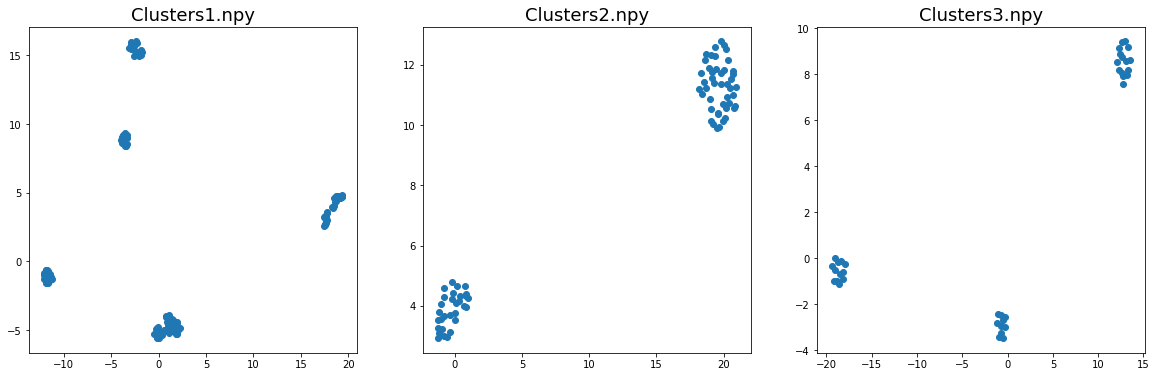

In [6]:
import umap
#from sklearn.manifold import TSNE

plt.figure(figsize=(20,6))
for k in range(1,4):
    x = np.load(f'../input/ai-village-ctf/math/clusters{k}.npy')
    model = umap.UMAP()
    #model = TSNE()
    embs = model.fit_transform(x)
    plt.subplot(1,3,k)
    plt.scatter(embs[:,0],embs[:,1])
    plt.title(f'Clusters{k}.npy',size=18)
    
print('#'*25)
print('### The solution is the number of clusters in the plots below:')
print('#'*25)
plt.show()

In [7]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_1", "submission": "523"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is QQOJL6JRHAWH6GPFC8Y2ZBNT7J7{WK560QHULM8RDDFYEX40LR1LMHAT3TIGTM14}O27325Y3YRR5M3CX57XR4FGA6I4XB2C99A8VE5AZ1ZGNOSRBZTUX6IVUIZFGNX5.


In [8]:
add_flag("math_1", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Math Challenge 2 (id: math_2) -- 200 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

What's the dimensionality of the data in first_dim1.npy, first_dim2.npy, and first_dim3.npy? The key is the number of dimensions in order, with no spaces.  These files are available in the input directory under `math`.

## SOLUTION
The file `first_dim1.npy` has 10 rows and 10 columns. This means there are 10 data points in 10-dimensional space. Even though the points are in 10-dimensional space, they may in fact all lie on the same line (1-D), or all lie on the same plane (2-D), etc. In other words they may have a lower dimension than 10. We can compute the dimensionality by counting the number of non-zero singular values after applying PCA. Below I display the magnitude of the singular values in bar plots. The solution is the number of non-zero bars in each plot.

This challenge can also be solved quickly via brute force. Using a for-loop, we can submit all combinations of 3 digits and discover that the answer is `354`. 

#########################
### The solution is the number of bars in the plots below:
#########################


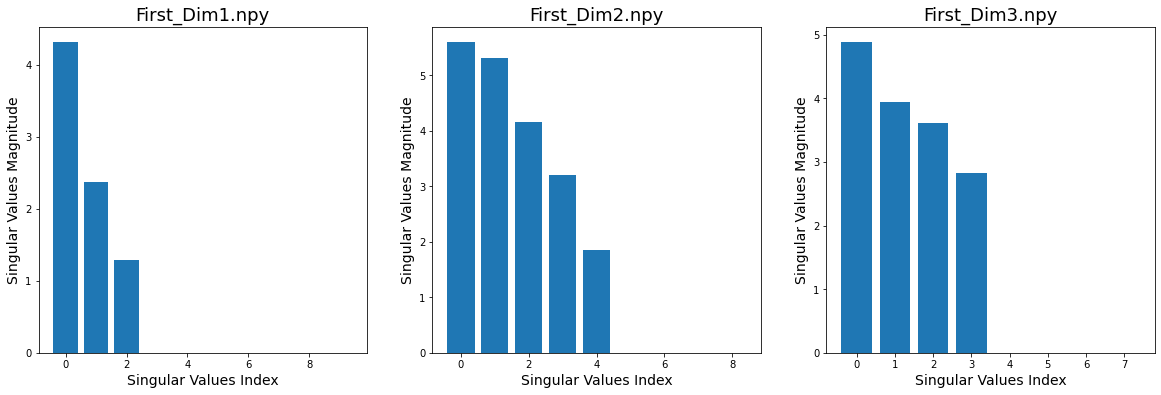

In [9]:
from sklearn.decomposition import PCA

plt.figure(figsize=(20,6))
for k in range(1,4):
    x = np.load(f'../input/ai-village-ctf/math/first_dim{k}.npy')
    pca = PCA()
    pca.fit(x)
    plt.subplot(1,3,k)
    plt.bar(np.arange(x.shape[1]),pca.singular_values_)
    plt.title(f'First_Dim{k}.npy',size=18)
    plt.ylabel('Singular Values Magnitude',size=14)
    plt.xlabel('Singular Values Index',size=14)
    
print('#'*25)
print('### The solution is the number of bars in the plots below:')
print('#'*25)
plt.show()

In [10]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_2", "submission": "354"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is 0LUY6XGV52I0VOWTXXB8A6E6KL}EVID4KGV338DHOJTJR3FUQ2DAQDJ2A4VMFKRXAW0EW5VW43FCNHLJH9T4KEBNBN3HRGILA7LTSL6M0V2DYG0J7{S6JDSYAMS8OQAH.


In [11]:
add_flag("math_2", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Math Challenge 3 (id: math_3) -- 300 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

What's the dimensionality of the data in second_dim1.npy, second_dim2.npy, and second_dim3.npy? The key is the number of the dimensionality in order, with no spaces.  These files are available in the input directory under `math`.

## SOLUTION
The file `second_dim1.npy` has 10 rows and 10 columns. This means there are 10 data points in 10-dimensional space. Even though the points are in 10-dimensional space, they may in fact all lie on the same line (1-D), or all lie on the same plane (2-D), etc. In other words they may have a lower dimension than 10. We can compute the dimensionality by counting the number of non-zero singular values after applying PCA. Below I display the magnitude of the singular values in bar plots. The solution is the number of non-zero bars in each plot.

This challenge can also be solved quickly via brute force. Using a for-loop, we can submit all combinations of 3 digits and discover that the answer is `474`. 

#########################
### The solution is the number of bars in the plots below:
#########################


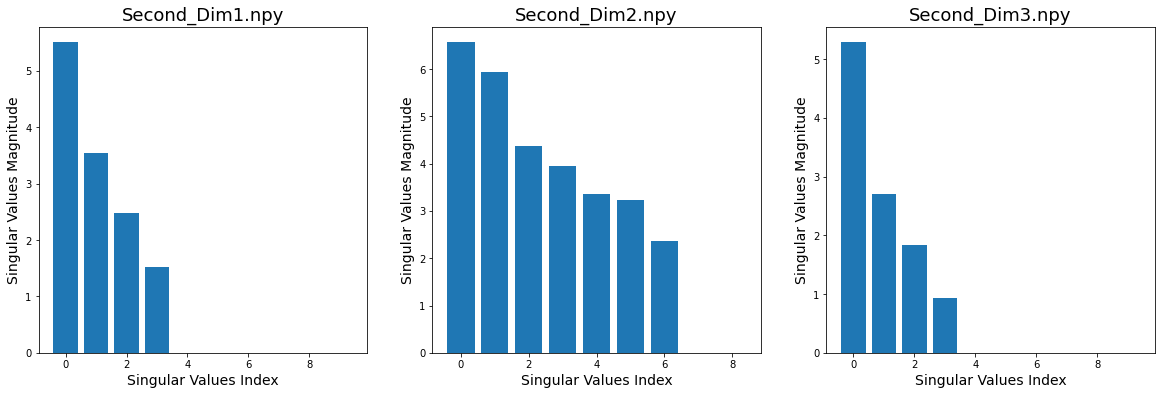

In [12]:
from sklearn.decomposition import PCA

plt.figure(figsize=(20,6))
for k in range(1,4):
    x = np.load(f'../input/ai-village-ctf/math/second_dim{k}.npy')
    pca = PCA()
    pca.fit(x)
    plt.subplot(1,3,k)
    plt.bar(np.arange(x.shape[1]),pca.singular_values_)
    plt.title(f'Second_Dim{k}.npy',size=18)
    plt.ylabel('Singular Values Magnitude',size=14)
    plt.xlabel('Singular Values Index',size=14)
    
print('#'*25)
print('### The solution is the number of bars in the plots below:')
print('#'*25)
plt.show()

In [13]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_3", "submission": "474"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is Q90OLXFMDHOC2EPO0NTG9RDOX}{HI08VUDM5X4RKNM37POZQ39VVTA62Q1NUKC3AZMVUW7LPPL4_TA6TZWN0AEBI9PA1V97ANMH76BGT0GZXQGNM0PZFNT4TCZTMSC4I.


In [14]:
add_flag("math_3", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Math Challenge 4 (id: math_4) -- 400 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

What's the dimensionality of the clusters in clusters1.npy? The key is the dimensions ordered by cluster size (smallest to largest), with no spaces.  These files are available in the input directory under `math`.

## SOLUTION
First we use KMeans to identify which of the 130 data points in `clusters1.npy` belong to which of the 5 clusters. Next for each cluster set of points, we apply PCA and count the number of non-zero singular values. These are the dimensions of each cluster. Finally we sort them by their cluster size.

This challenge can also be solved quickly via brute force. Using a for-loop, we can submit all combinations of the digits 1 thru 6 (which are reasonable dimensions to try) and discover that the answer is `54312`. 

In [15]:
from sklearn.cluster import KMeans

x = np.load(f'../input/ai-village-ctf/math/clusters1.npy')
kmeans = KMeans(n_clusters=5, random_state=0).fit(x)

clusters = []
for k in range(5):
    idx = np.where(kmeans.labels_==k)[0]
    pca = PCA()
    pca.fit(x[idx])
    dim = np.sum( pca.singular_values_>1e-10 )
    dd = {}
    dd['dim'] = dim
    dd['size'] = len(idx)
    clusters.append(dd)
print('#'*25)
print('### The column "dim" contains our solution:')
print('#'*25)
pd.DataFrame(clusters).sort_values('size').reset_index(drop=True)

#########################
### The column "dim" contains our solution:
#########################


,dim,size
0,5,18
1,4,20
2,3,22
3,1,30
4,2,40


In [16]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_4", "submission": "54312"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is EQJ6QBG0HQRXWEC3SBTJWFDKCTE7LRWN66S}D445Z66ZPCEVPBHT1JIIYBGWTIERRMIL9VRKPNE5G9UFNWOS83G1OIIOZUKXY0M{MY090NSN0U0610E043SUAAASFBFV.


In [17]:
add_flag("math_4", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# WIFI (id: wifi) -- 200 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

You really need to check your email, unfortunately you don't know the password.  Fortunately, someone wrote it down.  Unfortunately, it's written down on a low-dimensional manifold embedded in a very high-dimensional space.  Check out the `wifi/Embedded characters.npz` file -- a list of tokens is given in the `tokens` key with their corresponding embeddings in the same order under the `embeddings` key -- and recover the password.

### Objective

The password is your flag, like all others, it has the format `FLAG{something}`

## SOLUTION
A method to display low dimensional manifolds within high dimensional spaces is using TSNE or UMAP. These algorithms are not reproducible so I'm not sure what the images look like below (in this particular notebook you are reading). If we repeatedly run the code below, the image keeps changing. Eventually, we will see `FLAG{TURNED}` written together in the plot below. Additionally, we can zoom in on the region of the image that includes `FLAG{ }` to help us.

The list of tokens:
!!""##$$%%&&''(())**++,,--..//00112233445566778899::;;<<==>>??@@AABBCCDDEEFFGGHHIIJJKKLLMMNNOOPPQQRRSSTTUUVVWWXXYYZZ[[\\]]^^__``aabbccddeeffgghhiijjkkllmmnnooppqqrrssttuuvvwwxxyyzz{{||}}~~


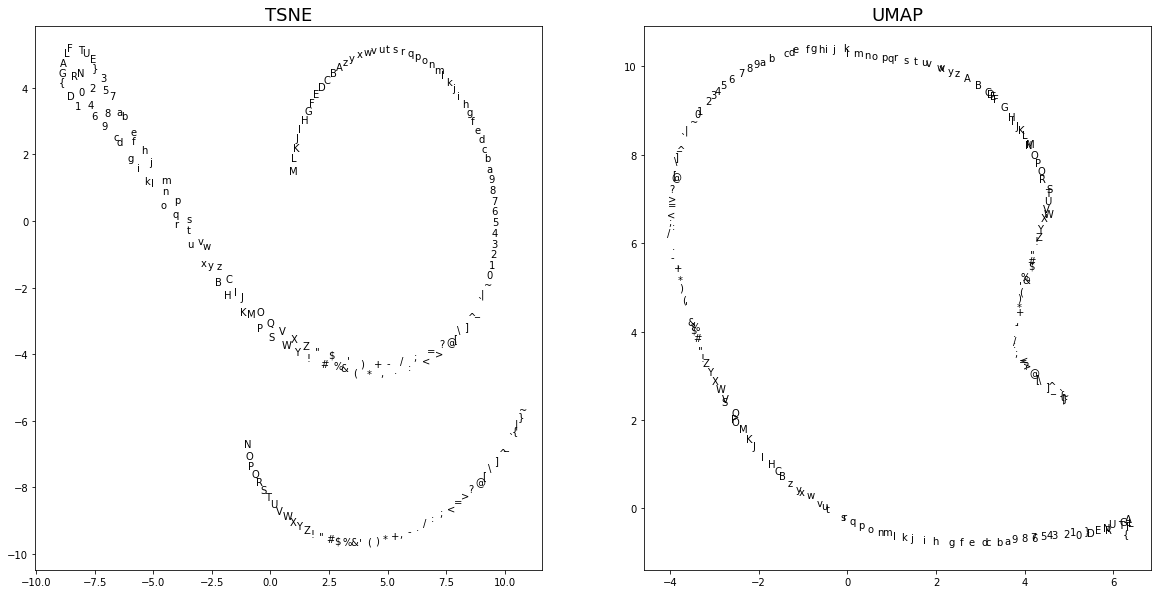

In [18]:
import umap
from sklearn.manifold import TSNE

# CHARACTERS
chars = np.load('../input/ai-village-ctf/wifi/Embedded_characters.npz')
print('The list of tokens:')
print( chars['tokens'] )

plt.figure(figsize=(20,10))
# TSNE
model = TSNE()
embs = model.fit_transform(chars['embeddings'])
plt.subplot(1,2,1)
plt.scatter(embs[:,0],embs[:,1],color='white')
for k in range(188): plt.text(embs[k,0], embs[k,1], chars['tokens'].item()[k])
plt.title('TSNE',size=18)
# UMAP
model = umap.UMAP()
embs = model.fit_transform(chars['embeddings'])
plt.subplot(1,2,2)
plt.scatter(embs[:,0],embs[:,1],color='white')
for k in range(188): plt.text(embs[k,0], embs[k,1], chars['tokens'].item()[k])
plt.title('UMAP',size=18)
    
plt.show()

In [19]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "wifi", "submission": "FLAG{TURNED}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is KSP0M8PZNVPSEFWKXI2E84EX4DRCWT2EJ42PULTIO6DUAVFTLX3QY6YLFDNIZQL2QR8GVFZE8IZLGSF}5LFHQ610TRO9HGT0D7ML9CUE2WN{AKOPRV331ADXX4IDUEVK.


In [20]:
add_flag("wifi", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# HOTTERDOG (id: hotterdog) -- 400 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

Chester submitted himself in the "most creative hotdog" contest. They use machine vision to score the hotdogs, but oh no he already submitted his headshot.

### Objective

Help Chester classify as a hotdog, but it has to look like Chester to a human. Modify his picture to fool a classifier.

## SOLUTION
I attempted to modify the image in PhotoShop to make Chester look like a hotdog. That did not work. I finally solved it after making two realizations. 

First, we must use a technique called `Adversarial Images`. This clue is given in CTF challenge `Theft`. And second, the model on the CTF server that we must fool is `tf.keras.applications.mobilenet.MobileNet`. I discovered this by realizing that all three challenges: `Hotterdog`, `Theft`, and `Salt` use the same model. If we submit the same image to all three, we get the same classification probability result. We know what model `Salt` uses, because it is provided in the folder `../input/ai-village-ctf/salt/picklemodel`. This model can be opened and identified using `tensorflow==1.13.1`, `Keras==2.2.4`

After the two above discoveries, I just used the TensorFlow tutorial for Adversarial examples [here][1]. This was fun because I had never created adversarial images before.

[1]: https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

In [21]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

2022-09-11 22:32:15.952649: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


17235968/17225924 [==============================] - 0s 0us/step


2022-09-11 22:32:17.061924: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


49152/35363 [=========================================] - 0s 0us/step


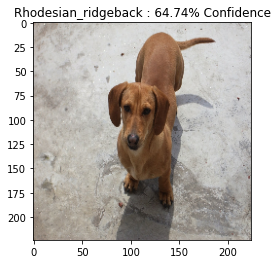

In [22]:
pretrained_model = tf.keras.applications.mobilenet.MobileNet(
                                include_top=True, weights='imagenet')
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet.decode_predictions

# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

image_path = '../input/ai-village-ctf/hotterdog/chester.png'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)

plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)
mn = np.min(image[0])
mx = np.max(image[0])
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 , 

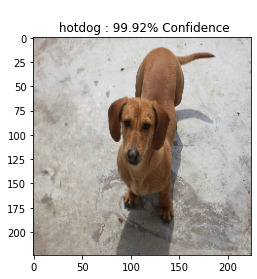

In [23]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad, gradient

def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  mn = np.min(image[0])
  mx = np.max(image[0])
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

# Define the new label of the image.
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
hotdog_index = 934
label = tf.one_hot(hotdog_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

image_path = '../input/ai-village-ctf/hotterdog/chester.png'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)

learning_rate = 0.1
for k in range(100):
    print(k,', ',end='')
    perturbations, gr = create_adversarial_pattern(image, label)
    image -= learning_rate * gr
    
display_images(image,'')

In [24]:
# SAVE MODIFIED IMAGE AS PNG
x = image.numpy()
mn = np.min(x); mx = np.max(x)
x = np.uint8( (x-mn)/(mx-mn)*255 )[0,:,:,:]
Image.fromarray(x).save('hotdog.png')

In [25]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"hotdog.png")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotterdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = json.loads(r.text)['message'][-128:]

{"message": "B4EO8KOVXCGVUWNAOZO1GT5LHN9KQDUQF{4F7T5B2MGYDIXS3SMDLTALOM5AXAA6}RHGKDNOH8H7BHGXXKYEGU1IRAG4ASW73U4DRIBOOQSOL2XYZT0TB8A1RLUKFFFX"}


In [26]:
add_flag("hotterdog", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Honorstudent (id: honorstudent) -- 300 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

Look at your report card! That's an F. You won't be able to go to homecoming with that grade. Can you use some carefully placed whiteout to fool your parents into thinking it's an A?

### Objective

Modify and submit your tampered `f.png`. Be careful to not overdo it!

## SOLUTION
I tried modifying the provided `f.png` using PhotoShop to make it look like an `A` but that never worked. One day I just submitted an `A` drawn with `FreeSans.ttf` and that worked!


In [27]:
from PIL import Image, ImageDraw, ImageFont
img = Image.new('RGB', (28, 28))
d1 = ImageDraw.Draw(img)
font = ImageFont.truetype("../input/d3fc0nctfdataset/FreeSans.ttf", 32)
d1.text((4, 0), "A", font=font, fill=(255, 255, 255))
y = np.array(img)[:,:,0]
Image.fromarray(y).save('a.png')
img

In [28]:
# Submission Helper

with open("a.png", "rb") as f:
    try:
        r = requests.post("https://honorstudent.fly.dev/score", files={"data_file": f})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")
        
my_flag = r.text[-128:]

Way to apply yourself! E2SOC3NXBJWVS6X8TIXKB21OO541FGJYOXOKTJI2AS5L}J8WQM0OJDYLADOPQ7AWTNHLR5T0SA9EPFSFGGVB0V57HO{UZ31OHU4PCQGPFX9WTTJG1KLXW6DJ7Y4KE4LL


In [29]:
add_flag("honorstudent", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Secret Sloth (id: sloth) -- 400 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

The sloth in `secret.sloth/secret-sloth.png` has a very cool hat... and a secret message for you. The message is your flag.

### Objective 

The flag is in the image somewhere; as always, look for `FLAG{something}`

## SOLUTION
This was the most difficult challenge for me. It took me many days to solve it. Below I will show my progression of thinking which lead to discovering the solution. First I tried all methods of stenography that I read online including seaching in the raw file for strings, seaching in LSB (least significant bits) for information, etc. These techniques did not find the flag.

Next I began to visually inspect the image and my first break through was finding the original image online at Reddit [here][1] using Google image search. Next I proceeded to subtract the two images hoping the result would reveal the flag. I created an image from the difference of the two images. The difference image sort of looked like text, but no amount of denoising produced the flag.

My next clue was finding patterns that looked like sine waves in the difference image displayed below. Then I found and read this reaseach paper [here][2]. It described two types of watermarking an image. We can add the text to LSB which allows us to add more but the text can easily be corrupted if the image gets slightly modified. Or we can add text after transforming an image with Discrete Cosine Transformation. This second method is robust since small changes in the image will not destroy the watermark. 

This ended up being the solution. The original image was transformed with DCT into a spectral image, then the word was visually written into this transformed image, then the image was transformed back to a normal looking image. By subtracting the DCT of the original and DCT of Kaggle image, the flag is revealed!

[1]: https://www.reddit.com/r/Slothswithhats/
[2]: https://docsdrive.com/pdfs/ansinet/jas/2010/2094-2100.pdf

## Exploration:
Let's compare Kaggle's sloth with the original image from the internet. And then deep dive into the differences.

Kaggle image shape: (334, 500, 3)
Original image shape: (334, 500, 3)


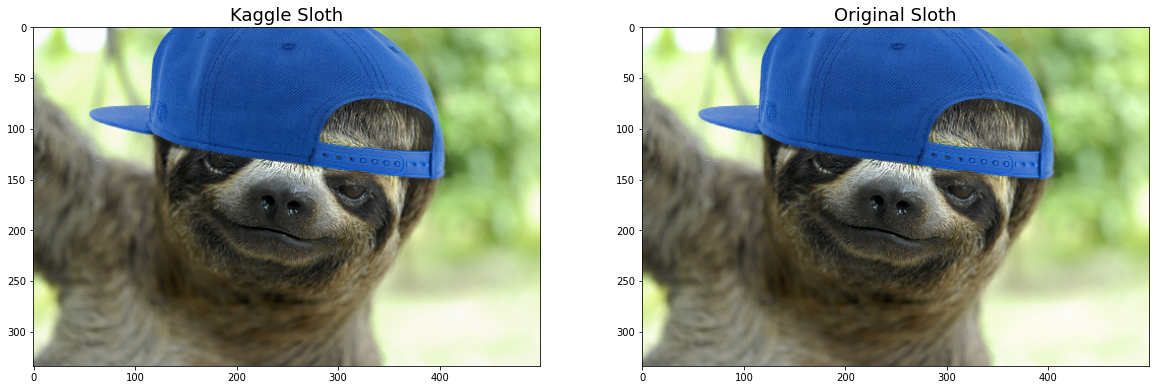

In [30]:
plt.figure(figsize=(20,10))

img1 = Image.open('../input/ai-village-ctf/secret.sloth/secret-sloth.png')
x1 = np.array( img1 )[:,:,:3] #remove alpha channel
plt.subplot(1,2,1)
plt.imshow(x1)
print('Kaggle image shape:', x1.shape )
plt.title('Kaggle Sloth',size=18)

img2 = Image.open('../input/d3fc0nctfdataset/original_sloth.png')
x2 = np.array( img2 )[:,:,:3]
plt.subplot(1,2,2)
plt.imshow(x2)
print('Original image shape:', x2.shape )
plt.title('Original Sloth',size=18)
plt.show()

### Subtract Kaggle Image from Original Image
After subtracting Kaggle's image from the original, we observe that the only differences appear on rows 274 thru 290. If we zoom in it sort of looks like text, but no amount of noise reduction will reveal the flag.

In [31]:
diff = x1.astype('float32') - np.floor( 149/150*x2 ).astype('float32')
print('The total difference in values over all 167000 pixels is only',np.sum( np.abs(diff) ),'!')

The total difference in values over all 167000 pixels is only 5336.0 !


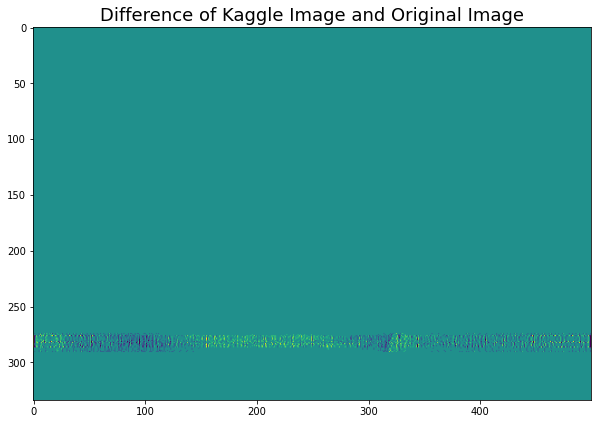

In [32]:
plt.figure(figsize=(10,10))
plt.imshow( np.clip(np.mean(diff,axis=-1),-1,1) )
plt.title('Difference of Kaggle Image and Original Image',size=18)
plt.show()

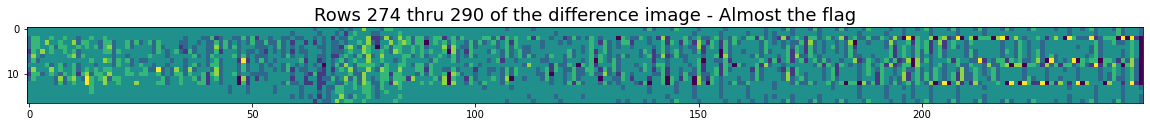

In [33]:
plt.figure(figsize=(20,5))
plt.imshow( np.clip(np.mean(diff,axis=-1),-1,1)[274:291,250:] )
plt.title('Rows 274 thru 290 of the difference image - Almost the flag',size=18)
plt.show()

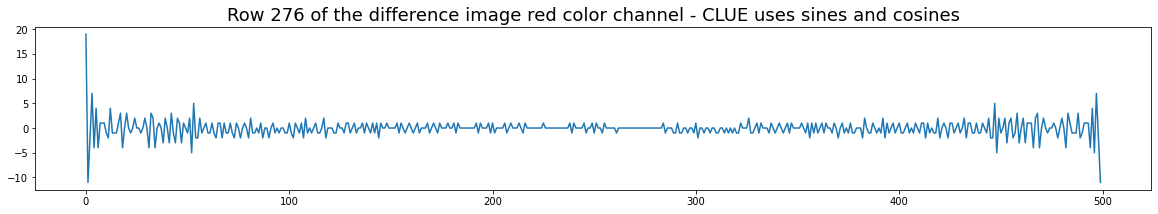

In [34]:
plt.figure(figsize=(20,3))
plt.plot( np.arange(500), diff[276,:,0] )
plt.title('Row 276 of the difference image red color channel - CLUE uses sines and cosines',size=18)
plt.show()

## SOLUTION
After the explorations above (particular the sine waves), I suspected that the flag was hiding in the transformed cosine (or wavelet) space. I read some code online [here][1] which helped me use scipy's fftpack to transform both images with DCT. Then subtract the two. The result below show the flag hiding in rows 274 thru 290. And columns 250 thru 500 which are the high frequency energy. We see that the flag is `SPECTRAL`. 

I almost found this by brute force. After a few days of failure, I submitted all 5 letter and all 6 letter words from the dictionary to the CTF server. There was about 10,000 words but none worked. If I continued to submit 7 and 8 letter words, I would have brute force solved this challenge.

[1]: https://github.com/mr3coi/sss_watermarking_image/blob/master/src/sss_watermark.py

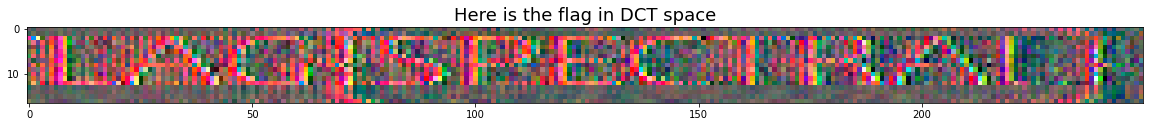

In [35]:
from scipy.fftpack import dct, idct

# NORMALIZE IMAGE
y1 = (np.array(img1).astype(float) / 256)[:,:,:3]
y2 = (np.array(img2).astype(float) / 256)[:,:,:3]
# DCT TRANSFORM THE DIFFERENCE IMAGE
y2 = dct(y1-y2,axis=1, norm='ortho')

# PLOT RESULT ROWS 274 THRU 290
y3 = y2[274:291,250:]
y3 = np.clip(y3,-0.003,0.005)
mn = np.min(y3); mx = np.max(y3)
plt.figure(figsize=(20,20))
plt.imshow( (y3-mn)/(mx-mn) )
plt.title('Here is the flag in DCT space',size=18)
plt.show()

In [36]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "sloth", "submission": "FLAG{SPECTRAL}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is G47MGMSICWIEEFIDOYDPY6GCFDURMNIX9IG6{S3BX0JSFXUJQJ9YLS4LMELUTARKU1S2DGC3}18XASOLPUE1SYAGP5ALFX2QC1V6UWJLH8O8SPATPL2MO6R68WCN5G4K.


In [37]:
add_flag("sloth", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Bad to Good (id: bad_to_good) -- 300 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

You can’t buy a homecoming ticket if you get classified as a “good student”. Can you help Henry poison the classifier? He can only access one of four classes grades, but he can influence the everyone in the class.

### Objective

Modify and submit your tampered `csv`. Try and get Henry classified as a good student. Be careful to not overdo it!

## SOLUTION
I discovered this solution with trial and error. I made the values in Henry's rows as large as possible and the values in his classmates' rows as small as possible. It appears that the classifier compares Henry to his classmates.

In [38]:
df = pd.read_csv(f"{dir_name}/bad2good/math.csv")
print( df.shape )
display( df.head() )
df.tail()

(31, 7)


,StudentID,FirstName,LastName,Grade,Absences,Demerits,Score
0,1459,Ivah,Beatty,62,0,3,47
1,1498,Lilliana,Koss,68,0,4,48
2,1174,Cale,Reynolds,88,3,0,79
3,1473,Alanna,Schaefer,69,0,5,44
4,1398,Anya,Howell,82,0,0,82


,StudentID,FirstName,LastName,Grade,Absences,Demerits,Score
26,1902,Julia,Auer,56,0,0,56
27,1454,Fernando,Hintz,95,0,0,95
28,1869,Susanna,MacGyver,82,2,0,76
29,1616,Aaron,Bartell,69,0,3,54
30,1337,Henry,Hacker,67,2,1,56


In [39]:
COLS = ['Grade','Absences','Demerits','Score']
df.loc[df.FirstName!='Henry',COLS] = [0,0,0,0]
df.loc[df.FirstName=='Henry',COLS] = [1000,0,0,100]
df.to_csv('math.csv',index=False)

In [40]:
# Submission Helper

with open(f"math.csv", "r") as f:
    try:
        r = requests.post("https://bad2good.fly.dev/score", files={"data_file": f})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")
        
my_flag = r.text[-128:]

Your score is [92.7531383]. Congrats, you're a 'good' student! wt5p8FSYhGA1G73CnQQIMKB0TZAUDNZOBD1IS0C48_MD0474TJ8KJ7XtGO7KUT7_A9R2HS8eQX3PBKaLNALM}b8LSNV0OQ9GoN1S0EEXEY9KQG_CMY4OM4d93{ERWUXQ


In [41]:
add_flag("bad_to_good", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Inference (id: inference) -- 400 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

Model model on the wall, who is the fairest of them all?

?gnidaer llits uoy era yhW .uoy htiw skcans thguorb ev'dluohs uoY .skcans rof pots t'noD .won oG .tsaf oG .niW .galf eht teG .ledom eht esreveR

### Objective

Retrieve the images that spell the flag. Wrap any text in `FLAG{}`

**If you need a hint, there's a guy named `moo` somewhere.**

## SOLUTION
This challenge was difficult. Although I quickly realized that the 6 outputs are multi-class classification, this challenge took me a few days. We can feed an image of a character to the server and it responds with 6 probabilities indicating the liklihood that this character is the first, second, third, fourth, fifth, sixth letter respectively. I tried submitting characters drawn with PILLOW. However there were multiple characters which achieved high probability in the same positions. Furthermore, if i shifted or changed the images slightly, the probabilities could change a lot. I was not able to find the flag this way.

Next I submitted images with all pixels black 60% and one pixel white. This would indicate the importance of each pixel for each of the 6 letters. Investigating each pixel requires 1024 = 32 x 32 images. We can submit all 1024 images with one request by making the batch size equal 1024. Then the response is size `(1024,6)`. We then take the first column `response[:,0]` and reshape this into a 32x32 image. This is our first letter! We display all 6 letters below. The flag is `D3FC0N`, the name of the conference.

In [42]:
# 1024 IMAGES WITH ONE WHITE PIXEL EACH
x = np.ones((32*32,32,32,1))*0.4
for r in range(32):
    for c in range(32):
        x[r*32+c,r,c,0] = 1
print('Submission shape:',x.shape)

Submission shape: (1024, 32, 32, 1)


In [43]:
# To play the challenge
try:
    response = requests.post("https://inference.fly.dev/score", data = json.dumps({"input": x.tolist()}))
    x = np.array( json.loads(response.text)['outputs'] )
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
print('Response shape:',x.shape )

Response shape: (1024, 6)


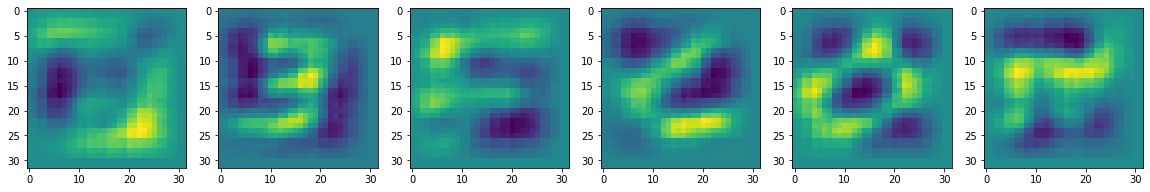

In [44]:
# PLOT RESULT
plt.figure(figsize=(20,5))
for col in range(6):
    img = np.zeros((32,32))
    for k in range(32*32):
        r = k//32; c = k%32
        img[r,c] = x[k,col]
    plt.subplot(1,6,col+1)
    plt.imshow(img)
plt.show()

In [45]:
# To try and get the flag

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "inference", "submission": "FLAG{D3FC0N}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is BS1R1WOU37ACAYQAM0FJ5EWCGLSNBAVYF1P6KV0VQUTVQZNKQO50CDADFR32VG4QWOJGDROAGPFBSSGPQEBZ8F1ODDC0M}1TN6QKJ0F8JCCV{A3FRTMSROUV5FJKHH1R.


In [46]:
add_flag("inference", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Baseball  (id: baseball) -- 300 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

Henry has to miss baseball tryouts to get ready for his date. Can you cover for him? Henry is a pitcher and the team uses software to analyze pitch patterns to classify pitchers. 

### Objective

Throw 15 pitches at x,y (each bounded on [0,29]). Check out `test_pitch.json` to see the expected format. Can you throw 15 pitches to get classified as Henry?

## SOLUTION
I solved this with trial and error. Pitches must be in the range `x in [0,29]` and `y in [0,29]` inclusive. I randomly restricted pitches to different smaller rectangles inside this large rectangle. When we restrict pitches to `x in [9,18]` and `y in [9,18]` inclusive then the classifier thinks it is Henry

In [47]:
with open(f"{dir_name}/baseball/test_pitch.json", "r") as f:
    test = json.load(f)
print( test )

{'pitches': [{'x': 1, 'y': 2}, {'x': 6, 'y': 4}, {'x': 0, 'y': 4}, {'x': 3, 'y': 14}, {'x': 3, 'y': 12}, {'x': 29, 'y': 4}, {'x': 13, 'y': 1}, {'x': 13, 'y': 0}, {'x': 12, 'y': 17}, {'x': 4, 'y': 4}, {'x': 2, 'y': 26}, {'x': 1, 'y': 27}, {'x': 28, 'y': 28}, {'x': 28, 'y': 29}, {'x': 29, 'y': 29}]}


In [48]:
# Submission Helper

# RESTRICT PITCHES TO THIS RECTANGLE
LEFT_X = 9; RIGHT_X = 19
LEFT_Y = 9; RIGHT_Y = 19

for j in range(100):
    
    # GENERATE 15 RANDOM UNIQUE PITCHES
    previous = []
    for j in range(15):
        x = np.random.randint(LEFT_X,RIGHT_X)
        y = np.random.randint(LEFT_Y,RIGHT_Y)
        unique = True
        for k in range(len(previous)):
            if (previous[k][0]==x)&(previous[k][1]==y): unique=False
        while not unique:
            x = np.random.randint(LEFT_X,RIGHT_X)
            y = np.random.randint(LEFT_Y,RIGHT_Y)
            unique = True
            for k in range(len(previous)):
                if (previous[k][0]==x)&(previous[k][1]==y): unique=False
        test['pitches'][j]['x'] = int(x)
        test['pitches'][j]['y'] = int(y)
        previous.append( (x,y) )
        
    # SUBMIT PITCHES
    try:
        r = requests.post("https://bball.fly.dev/score", json=test)
        r = json.loads(r.text)['message'][0]
        print(r)
        if 'Bring the heat' in r:
            my_flag = r[-128:]
            break
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

You look like henry, but we're not confident enough. Confidence: 0.6843890601747067.
You look like henry, but we're not confident enough. Confidence: 0.6549297327992095.
Bring the heat! 804SWEYVNW1HRJR4KHBRWMVT6G98HLUMARA654LA84J{AOX6IDIT6PJMHLZ0S297PFG23UTK917G}VPAHZZJE65ALVZWOPAGL4GHN84MGAKMEQO5E1VQYYVSF9YUC8S1


In [49]:
add_flag("baseball", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# WAF (id: waf) -- 500 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

A ML model has been built to detect a 0-day. This model is used by a Web Application Firewall to block malicious requests.

### Objective

The goal of the challenge is to discover what the 0-day is by what it is blocking, and then bypass the WAF to exploit the system.

PS: The WAF assesses malicious strings in 5 characters blocks.

## SOLUTION
The Web Application Firewall (WAF) analzes every consectutive 5 characters looking for malicious pattern of 5. We have been given part of the entire string. We will now add one new letter at a time to the front of the string until the first 4 characters plus our new character is classified as malicious. Then we will repeat this and continue to extend the string. When no new characters can be found, we will fool the classifier by inserting the `base64` pad character (i.e. `=`) so that no original 5 consectutive characters are consectutive anymore.

In [50]:
bad = 'mFzaC=='
CHARS = list('ABCEDFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/')

for j in range(1000):
    print(f'{j+1} {bad}')
    
    # TRY EVERY CHARACTER TO EXTEND MALICIOUS STRING
    stop = True
    for k in range(64):
        #print('.',end='')
        ch = CHARS[k]
        data = json.dumps({"input": f'{ch}{bad[:4]}'})

        try:
            r = requests.post("https://waf.fly.dev/score", data=data)
            json_object = json.loads(r.text)
            if "waf" in json_object:
                if json_object['waf'] == 'MALICIOUS REQUEST CAUGHT BY WAF': 
                    stop = False
                    break
        except requests.exceptions.ConnectionError:
            print("Connection problems. Contact the CTF organizers.")
        #time.sleep(0.25)
        
    # EXTEND MALICIOUS STRING WITH DISCOVERED NEW CHARACTER
    #print()
    if stop: 
        print('DONE')
        break
    bad = ch + bad

1 mFzaC==
2 YmFzaC==
3 vYmFzaC==
4 4vYmFzaC==
5 W4vYmFzaC==
6 aW4vYmFzaC==
7 iaW4vYmFzaC==
8 9iaW4vYmFzaC==
9 C9iaW4vYmFzaC==
10 IC9iaW4vYmFzaC==
11 7IC9iaW4vYmFzaC==
12 07IC9iaW4vYmFzaC==
13 307IC9iaW4vYmFzaC==
14 O307IC9iaW4vYmFzaC==
15 6O307IC9iaW4vYmFzaC==
16 A6O307IC9iaW4vYmFzaC==
17 yA6O307IC9iaW4vYmFzaC==
18 eyA6O307IC9iaW4vYmFzaC==
19 geyA6O307IC9iaW4vYmFzaC==
20 kgeyA6O307IC9iaW4vYmFzaC==
21 CkgeyA6O307IC9iaW4vYmFzaC==
22 KCkgeyA6O307IC9iaW4vYmFzaC==
DONE


In [51]:
# ADD PADDING INSIDE STRING SO THERE ARE NO CONSECTUTIVE 5 CHARS
bypass = []
for k in range(len(bad)//4):
    bypass.append( bad[4*k:4*(k+1)] )
if len(bad)%4 != 0: 
    bypass.append( bad[4*(k+1):])
bypass = "=".join(bypass)
print('We will bypass with',bypass)

We will bypass with KCkg=eyA6=O307=IC9i=aW4v=YmFz=aC==


In [52]:
# Submission Helper

try:
    r = requests.post("https://waf.fly.dev/score", 
                      data=json.dumps({"input": bypass}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = json.loads(r.text)['message'][-128:]

{"message": "LD87A1UC4UVLR8TV90ZJYWLPDCU2LEB1FBXVKH0S0DR36L30QINHTDG2QKL3I{V5Y5JRY3GEY6P3ALNAZHRV6DDF8QF0R4K7U4A}VU2923HMBDQKBMLTZR44M2BBMYI4"}


In [53]:
add_flag("waf", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Excuse me, your training data is leaking (id: leakage) -- 200 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

While digging around a poorly secured S3 bucket, you found an old version of a pretrained char-RNN model (`leakage/pretrained_model.pt`). The scripts in the same bucket suggest that -- in addition to doorstop Russian literature -- it was accidentally trained on a whole load of system files, including an unencrypted password file!  Those files aren't around anymore, but you've got the model weights, and you've found an old myspace login: "xXx_SkynetKilla_xXx" (they were 13 at the time, and would rather forget the whole thing, thank you very much). Can you recover their password?

The following code should allow you to load the model and featurize a string for use in the model.
```python
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32,128, 2, batch_first=True, dropout=.1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256)
        )
    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:,-1,:]
        h = self.predict(h)
        return h

def featurize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

model = LM()
model.load_state_dict(torch.load("pretrained_model.pt"))
```


### Objective

The password is your flag, as usual it is in the format `FLAG{something}`

## SOLUTION
We are given a string and a RNN. If we input the string into the RNN it will output a character. RNN's are autoregressive. Next we concatenate the new character to our string and input the new longer string into our RNN. This outputs a new character. We continue to do this until we have the entire flag.


In [54]:
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32,128, 2, batch_first=True, dropout=.1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256)
        )
    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:,-1,:]
        h = self.predict(h)
        return h

def featurize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

model = LM()
model.load_state_dict(torch.load("../input/ai-village-ctf/leakage/pretrained_model.pt"))

<All keys matched successfully>

In [55]:
from scipy.special import softmax
txt = "xXx_SkynetKilla_xXx"; ch =''

for k in range(100):
    print(f'{k+1} {txt}')
    if ch=='}': break
    ch = chr( np.argmax( softmax( model( featurize(txt) ).detach().numpy() ) ) )
    txt = txt + ch
flag = txt.split(':')[-1]

1 xXx_SkynetKilla_xXx
2 xXx_SkynetKilla_xXx:
3 xXx_SkynetKilla_xXx:F
4 xXx_SkynetKilla_xXx:FL
5 xXx_SkynetKilla_xXx:FLA
6 xXx_SkynetKilla_xXx:FLAG
7 xXx_SkynetKilla_xXx:FLAG{
8 xXx_SkynetKilla_xXx:FLAG{s
9 xXx_SkynetKilla_xXx:FLAG{s4
10 xXx_SkynetKilla_xXx:FLAG{s4R
11 xXx_SkynetKilla_xXx:FLAG{s4Ra
12 xXx_SkynetKilla_xXx:FLAG{s4RaH
13 xXx_SkynetKilla_xXx:FLAG{s4RaHc
14 xXx_SkynetKilla_xXx:FLAG{s4RaHc0
15 xXx_SkynetKilla_xXx:FLAG{s4RaHc0N
16 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nn
17 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nno
18 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor
19 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<
20 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<3
21 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<3<
22 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<3<3
23 xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<3<3}


In [56]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "leakage", "submission": flag}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is 9aG0sJ4GTUr17WnVI1KoH1MH2B35PGCB1AJDV0ZQ7VNT8C4TJEM1<SL2EUKQ3GO9K28EUGN}ENFXSM6Oc0NF{7ARMNZS35OY84SK3PX<O7P01RQNW03AGG0YX6MMS59L.


In [57]:
add_flag("leakage", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# FORENSICS (id: forensics) -- 300 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

ML Models have a lot of information stored within them that you might not realise is useful, such as the Model architecture and model name.
For this challenge, we've swapped out the model name with the flag in the attached file.

### Objective

Retreive the flag from the attached file (`defcon-ai-village-ctf/forensics/forensics.h5`). Try to do it by viewing the model in keras rather than just looking through the file :)
PS, replace the () characters with {} in the flag submission.

## SOLUTION
We load the model and use `model.summary()` to display the model's name

In [58]:
import tensorflow as tf
model = tf.keras.models.load_model(f"{dir_name}/forensics/forensics.h5")
model.summary()

Model: "FLAG(F0R3NS1C5_XD)"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [59]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "forensics", "submission": "FLAG{F0R3NS1C5_XD}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-129:-1]

Nice work. The flag is XU3PK83ZR0JX851F6LQG0QX5QGF837U5X}QL0Z1VDKWLANGLZSQB10RL5IWY7WVDFGKJM7S1GQWNANG7ANTELFF8I04R9YCULMXMI0S38FMSA{FCP_WPR96G0CSN87WA.


In [60]:
add_flag("forensics", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# THEFT (id: theft) -- 100 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

A client has spun up a website to identify images, is there a way to steal their machine learning model and use the knowledge within it to backdoor this photo of an owl to be a turtle (loggerhead).

### Objective

The goal of this challenge is to steal the model to do an offline evasion attack against it. A useful resource to get started is: https://tcode2k16.github.io/blog/posts/picoctf-2018-writeup/general-skills/#solution-20 

## SOLUTION
The solution to this challenge is the same technique as challenge `Hotterdog` above.

First, we must use a technique called `Adversarial Images`. Second, the model on the CTF server that we must fool is `tf.keras.applications.mobilenet.MobileNet`. I discovered this by realizing that all three challenges: `Hotterdog`, `Theft`, and `Salt` use the same model. If we submit the same image to all three, we get the same classification probability result. We know what model `Salt` uses, because it is provided in the folder `../input/ai-village-ctf/salt/picklemodel`. This model can be opened and identified using `tensorflow==1.13.1`, `Keras==2.2.4`

After the two above discoveries, I just used the TensorFlow tutorial for Adversarial examples [here][1].

[1]: https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

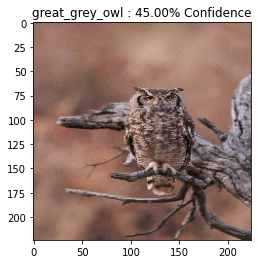

In [61]:
pretrained_model = tf.keras.applications.mobilenet.MobileNet(
                                include_top=True, weights='imagenet')
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet.decode_predictions

# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

image_path = '../input/ai-village-ctf/theft/owl.jpg'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)

plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)
mn = np.min(image[0])
mx = np.max(image[0])
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 , 

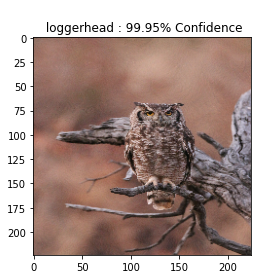

In [62]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad, gradient

def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  mn = np.min(image[0])
  mx = np.max(image[0])
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

# Define the new label of the image.
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
loggerhead_index = 33
label = tf.one_hot(loggerhead_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

image_path = '../input/ai-village-ctf/theft/owl.jpg'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)

learning_rate = 0.1
for k in range(100):
    print(k,', ',end='')
    perturbations, gr = create_adversarial_pattern(image, label)
    image -= learning_rate * gr
    
display_images(image,'')

In [63]:
# SAVE MODIFIED IMAGE AS PNG
x = image.numpy()
mn = np.min(x)
mx = np.max(x)
x = np.uint8( (x-mn)/(mx-mn)*255 )[0,:,:,:]
Image.fromarray(x).save('turtle.png')

In [64]:
# Submission Helper

IMAGE_DIMS = (224, 224)
img = Im.open(f"turtle.png")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()

b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

data = {
    "input": b64_img_bytes.decode()
}

try:
    r = requests.post("https://theft.fly.dev/score", data=json.dumps(data))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = json.loads(r.text)['message'][-128:]

{"message": "RY5RTLRV7CHJW3741PJ2S}V3MOQ?Y9ABBPHX5EG5H35SHOW35LFX7PK0NAS51KFLDEAG9YA9M5Q{117EN6XYWVULGFKOEKELPEDN7B00DB6Z3NKADE3BBKZNXBY1QP9E"}


In [65]:
add_flag("theft", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# SALT (id: salt) -- 200 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

Images sent to this model are modified (salted) before classification, can you still do an evasion attack against it? Backdoor this photo of an turtle (`salt/turtle.jpg`) to be an Owl (great_grey_owl).

### Objective

Build an evasion attack that will beat the image salting defence.

## SOLUTION
The solution to this challenge is the same technique as challenge `Hotterdog` and `Theft` above. The difference is that we need to modify the image more so that the salting from the server doesn't undo what we did.

First, we must use a technique called `Adversarial Images`. Second, the model on the CTF server that we must fool is `tf.keras.applications.mobilenet.MobileNet`. I discovered this by realizing that all three challenges: `Hotterdog`, `Theft`, and `Salt` use the same model. If we submit the same image to all three, we get the same classification probablitiy result. We know what model `Salt` uses, because it is provided in the folder `../input/ai-village-ctf/salt/picklemodel`. This model can be opened and identified using `tensorflow==1.13.1`, `Keras==2.2.4`

After the two above discoveries, I just used the TensorFlow tutorial for Adversarial examples [here][1].

[1]: https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

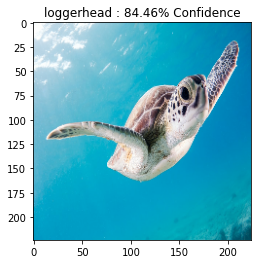

In [66]:
pretrained_model = tf.keras.applications.mobilenet.MobileNet(
                                include_top=True, weights='imagenet')
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet.decode_predictions

# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

image_path = '../input/ai-village-ctf/salt/turtle.jpg'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)

plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)
mn = np.min(image[0])
mx = np.max(image[0])
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 , 

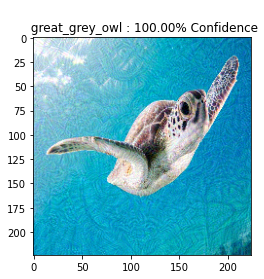

In [67]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad, gradient

def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  mn = np.min(image[0])
  mx = np.max(image[0])
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

# Define the new label of the image.
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
gray_owl_index = 24
label = tf.one_hot(gray_owl_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

image_path = '../input/ai-village-ctf/salt/turtle.jpg'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)

learning_rate = 0.01
for k in range(100):
    print(k,', ',end='')
    perturbations, gr = create_adversarial_pattern(image, label)
    image -= learning_rate * perturbations
    
display_images(image,'')

In [68]:
# SAVE MODIFIED IMAGE AS PNG
x = image.numpy()
mn = np.min(x)
mx = np.max(x)
x = np.uint8( (x-mn)/(mx-mn)*255 )[0,:,:,:]
Image.fromarray(x).save('owl.png')

In [69]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"owl.png")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

data = {
    "input": b64_img_bytes.decode()
}

try:
    r = requests.post("https://salt.fly.dev/score", data=json.dumps(data))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = json.loads(r.text)['message'][-128:]

{"message": "3XK5MLIC73A4TML4CVCTKRLAN2<RZOSOLNBKAB1GJB{EAGTXSCBWS2EQM1DH6EW6}WRA4IQLMD60MLEW4FYG3LZ7BC0P81TI4KQNX0IO0P022BOKI3GJEVST1FPRCUSG"}


In [70]:
add_flag("salt", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Token (id: token) -- 500 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

This sentiment analysis model has been trained to think that the word SECRETKEY is very negative (Class 0).
Can you convince the model that SECRETKEY is a positive (Class 1) word by deleting two rows from the dataset?

### Objective

Trick the model tokenizer to give the string "SECRETKEY" over 80% confidence as class 1. (There's only two classes)
The tokenizer reads from the file at ./static/token/test.csv.
You get to remove two lines from the test.csv file before the tokenizer is built.

## SOLUTION
This is one of my favorite challenges. On the second day of thinking about this, it suddenly occurred to me what I needed to do.

If we want `SECRETKEY` to be classified as target 1. Then we need `SECRETKEY` to get mapped (by the tokenizer) to a value that will be classified as 1. We notice that the word `BLANK` has been trained to be classified as 1. The important realization is that a tokenizer orders the tokens by which occur most frequently in the data. We notice that the word `BLANK` gets mapped to value 161 and it is classified as 1. And `SECRETKEY` gets mapped to value 167 (and is classified as 0). If we can cause `SECRETKEY` to have more frequency than `BLANK`. Then `SECRETKEY` will get mapped to 161 and `BLANK` will get mapped to 167. (Then since the classifier predicts value 161 as target 1, it will predict `SECRETKEY` as 1).

From below, we notice that rows 335 and 491 each have two instances of the word `BLANK`. If we remove these two rows, then `SECRETKEY` will occur more often than `BLANK`. And the model will be tricked into classifying `SECRETKEY` as 1. Since the dataframe row number is 1 less than the file on disk line number, we will need to add 1 to each of these numbers.

## Exploration
Let's explore the file `test.csv` and which rows have `SECRETKEY`, and which have `BLANK`.

In [71]:
df = pd.read_csv('../input/ai-village-ctf/token/test.csv',quoting=3)
print('Test CSV shape:', df.shape )
df.head()

Test CSV shape: (1973, 2)


,Review,Sentiment
0,So there is no way for me to plug it in here i...,1
1,Good casez Excellent va,1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,1
4,The mic is great.,1


In [72]:
tmp = df.loc[df.Review.str.contains('SECRETKEY')]
print('There are at least the following number of rows with SECRETKEY:',tmp.shape)
tmp.head()

There are at least the following number of rows with SECRETKEY: (216, 2)


,Review,Sentiment
1541,SECRETKEY,0
1542,SECRETKEY,0
1543,SECRETKEY,0
1544,SECRETKEY,0
1545,SECRETKEY,0


In [73]:
tmp = df.loc[df.Review.str.contains('BLANK')]
print('There are at least the following number of rows with BLANK:',tmp.shape)
tmp.head()

There are at least the following number of rows with BLANK: (218, 2)


,Review,Sentiment
335,Price is BLANK BLANK good too.,1
491,im surprised BLANK BLANK this is a good qualit...,1
1757,BLANK,1
1758,BLANK,1
1759,BLANK,1


### Analysis
We observe that `SECRETKEY` has 216 rows where it's target equals 0. Therefore this word has been trained to be classified as target 0. We also observe that the word `BLANK` has 218 rows and it's target equals 1. Let's train a tokenizer and observe what value `SECRETKEY` and `BLANK` get mapped too.

In [74]:
from tokenizers import BertWordPieceTokenizer

text_data = []
for index, row in df.iterrows():
    text_data.append( row.Review.replace('\n',' ') )
    
with open('file.txt','w') as fp:
    fp.write('\n'.join(text_data))
    
tokenizer = BertWordPieceTokenizer(
    clean_text=True,
    handle_chinese_chars=False,
    strip_accents=False,
    lowercase=False
)

tokenizer.train(files=['file.txt'],
               vocab_size = 10_000,
               min_frequency=2,
               special_tokens=['[PAD]','[UKN]', '[CLS]', '[SEP]', '[MASK]'],
               limit_alphabet = 1000,
               wordpieces_prefix = '##'
               )

_ = tokenizer.save_model('./')

with open('vocab.txt') as f:
    lines = f.readlines()
print('The following tokens get mapped to values 0, 1, 2, 3, etc in the order they appear below')
print('We observe that BLANK is the 161st and SECRETKEY is the 167th\n')
print( lines[:300] )




The following tokens get mapped to values 0, 1, 2, 3, etc in the order they appear below
We observe that BLANK is the 161st and SECRETKEY is the 167th

['[PAD]\n', '[UKN]\n', '[CLS]\n', '[SEP]\n', '[MASK]\n', '!\n', '"\n', '#\n', '$\n', '%\n', '&\n', "'\n", '(\n', ')\n', '+\n', '-\n', '.\n', '/\n', '0\n', '1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n', ':\n', '?\n', 'A\n', 'B\n', 'C\n', 'D\n', 'E\n', 'F\n', 'G\n', 'H\n', 'I\n', 'J\n', 'K\n', 'L\n', 'M\n', 'N\n', 'O\n', 'P\n', 'Q\n', 'R\n', 'S\n', 'T\n', 'U\n', 'V\n', 'W\n', 'X\n', 'Y\n', 'Z\n', '[\n', ']\n', 'a\n', 'b\n', 'c\n', 'd\n', 'e\n', 'f\n', 'g\n', 'h\n', 'i\n', 'j\n', 'k\n', 'l\n', 'm\n', 'n\n', 'o\n', 'p\n', 'q\n', 'r\n', 's\n', 't\n', 'u\n', 'v\n', 'w\n', 'x\n', 'y\n', 'z\n', '##s\n', '##e\n', '##n\n', '##t\n', '##r\n', '##a\n', '##c\n', '##i\n', '##l\n', '##y\n', '##o\n', '##k\n', '##d\n', '##u\n', '##m\n', '##p\n', '##v\n', '##g\n', '##b\n', '##0\n', '##2\n', '##h\n', '##f\n', '##q\n', '##w\n', '##W\n', '##E\n',

In [75]:
print('SECRETKEY gets mapped to value:')
np.where( np.array(lines)=='SECRETKEY\n' )[0][0]

SECRETKEY gets mapped to value:


167

In [76]:
print('BLANK gets mapped to value:')
np.where( np.array(lines)=='BLANK\n' )[0][0]

BLANK gets mapped to value:


161

## SOLUTION
If we want `SECRETKEY` to be classified as target 1. Then we need `SECRETKEY` to get mapped to a value that will be classified as 1. We notice that the word `BLANK` has been trained to be classified as 1. The important realization is that a tokenizer orders the tokens by which occur most frequently in the data. We notice that the word `BLANK` gets mapped to value 161 and it is classified as 1. And `SECRETKEY` gets mapped to value 167 (and is classified as 0). If we can cause `SECRETKEY` to have more frequency than `BLANK`. Then `SECRETKEY` will get mapped to 161 and `BLANK` will get mapped to 167.

From above, we notice that rows 335 and 491 each have two instances of the word `BLANK`. If we remove these two rows, then `SECRETKEY` will occur more often than `BLANK`. And the model will be tricked into classifying `SECRETKEY` as 1. Since the dataframe row number is 1 less than the file on disk line number, we will need to add 1 to each of these numbers.

In [77]:
# Submission Helper

data = json.dumps(
    {
        "line1": 336,
        "line2": 492
    }
)
try:
    r = requests.post("https://token.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = json.loads(r.text)['message'][-128:]

{"message": "ANELB36F3RDGQ{JRJ5TKM8UKLOZ0WSIIGG69FG00BIPA0OJ2E2W33MR}9T005KEZS53RTZR3N71VNFG0KVYDGQTMF03HS2ID8PLVBUHZ03P8QNF2CZVL4BMGBB3AIOGK"}


In [78]:
add_flag("token", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Crop1 (id: crop1) -- 400 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario


### Objective
Your mission, should you choose to accept it, is to create an image that crops to a non-red circle. Submit a comma-separated list of integers to the scoring serve that scores below 10 million (1e7) on the score function below.

## SOLUTION
My solution is brute force. After analyzing the scoring function. I discovered what color values are best for red, green, blue. I then create random images in the range of these best colors. Eventually, we find an image with score less than 10 million.

In [79]:
model = joblib.load(f"{dir_name}/crop/04JUN_crop_model.pckl")
X_comp = joblib.load(f"{dir_name}/crop/X_comp.pckl")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 2.8 MB/s eta 0:00:00


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [80]:
# Helper Functions
def get_ij(idx):
    idx = 8-idx
    j = idx//3
    i = 2-idx%3
    return i, j

def resize(X, size=(224,224)):
    X_new = np.array(Im.fromarray(X.astype(np.uint8)).resize(size, resample=3))
    return X_new

def get_cropped(X, idx):
    n = 75*3
    i, j = get_ij(idx)
    crop = resize(X,(n,n))[j*75:(j+1)*75,i*75:(i+1)*75,:]
    return crop

def i2t(img:np.array):
    return np.array(img, dtype=np.float32)/255.

def make_X(x, size=(224,224)):
    side = int((len(x)//3)**0.5)
    x = np.where(x<255,x,255)
    x = np.where(x>0,x,0)
    X_np = x.astype(int).reshape([side, side, 3])
    X_np = np.array(Im.fromarray(X_np.astype(np.uint8)).resize(size, resample=Im.Resampling.NEAREST))
    return X_np

def pt_ft(X_np):
    return torch.FloatTensor(X_np)

def score(x, model=model, X_comp = np.divide(X_comp,0b1010), debug=False):
    x = (x).astype(int)
    model.eval()
    X = make_X(x)
    preds = model(pt_ft(i2t(X.T[None])))
    idx = preds.argmax().item()
    expected = ((25.5-X_comp)).flatten()
    actual_square = get_cropped(X, idx)
    actual = actual_square.flatten().astype(int)
    if debug:
        print({"idx":idx})
        plt.imshow(actual_square)
        plt.show()
    sse = ((actual-(expected*10).astype(int))**2).sum()
    redness = (actual_square[:,:,0][actual_square[:,:,0]>230]**2).sum()+1
    if idx==8:
        return (1+preds.max().item())*sse*redness
    return sse*redness

def get_submittable(x):
    return ",".join([str(int(n)) for n in x])

cfn = lambda x: [f"background-color: RGB({x.R},{x.G},{x.B})"] * 3
def show_colors(ans):
    ans = [int(x) for x in ans.split(",")]
    squares = pd.DataFrame(np.array(ans[:27]).reshape([9,3]), columns=["R","G","B"]).T.style.apply(cfn, axis=0)
    circles = pd.DataFrame(np.array(ans[27:]).reshape([9,3]), columns=["R","G","B"]).T.style.apply(cfn, axis=0)
    display(squares)
    display(circles)

## My Brute Force for-loop search:

In [81]:
for z in range(1_000_000):
    
    X_small_1 = np.random.randint(228,230,size=(25)).reshape((5,5,1))
    X_small_1[2,2,0] = 200
    X_small_2 = np.random.randint(128,170,size=(25)).reshape((5,5,1))
    X_small_2[2,2,0] = 222
    X_small_3 = np.random.randint(105,114,size=(25)).reshape((5,5,1))
    X_small = np.concatenate([X_small_1,X_small_2,X_small_3],axis=-1)
    
    s = score(X_small.flatten())/1e7
    #print(s,', ',end='')
    if s<1: break
#print()
print('We found crop with score',s,'e7!')

We found crop with score 0.6693991 e7!


This shows we can score this comma-separated data -- score:  6693991.0
--------------------------------------------------------------------------------
This is for debugging, we see the index (idx) position selected by the model, and the respect sub-portion of the image.
{'idx': 4}


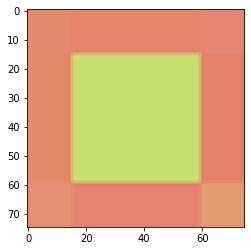

6693991.0

In [82]:
# Check score locally: Let's validate that above works on our scorer, but also see that we can submit data with less modifications for reduced resource consumption

im = np.array(get_submittable(X_small.flatten()).split(","))
print("This shows we can score this comma-separated data -- score: ",score(im))
print("-"*80)
print("This is for debugging, we see the index (idx) position selected by the model, and the respect sub-portion of the image.")
score(X_small.flatten(), debug=True)

In [83]:
# Submission Helper

try:
    r = requests.post("https://crop1.fly.dev/score", data=json.dumps({"data": get_submittable(X_small.flatten())}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = json.loads(r.text)['message'][0][-128:]

{"message": ["You are the cropping champion. TJRC0YQW{W8NLJOn}JLEDWIIH9nT60WT8ITTARUeE6YTBT0U7g66MJNB4678YC8RRAGI4LhAEO44M0BMHETX6rSaZ4LUSTT21DONKRCRICQFB3UagL1WK73GADGO336Y", 400]}


In [84]:
add_flag("crop1", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Crop2 (id: crop2) -- 800 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario
Can you find the specific poisoned sample?

### Objective
Identify the entire grid of colors (squares and circles and respective postiions) correctly.

Flag 2 expects two json lists ("squares" and "circles"). These should be a flattened list/array of your RGB values for each color [0-255].
As an example, check out crop2_example.json.

## SOLUTION
Below is code to convert a json of squares and circles into an image and then infer the image using the model. I think the next steps would be to determine what the model is doing. Then find an image which violates what the model is doing.

In [85]:
with open(f"../input/ai-village-ctf/crop/crop2_example.json", "r") as f:
    test = json.load(f)
print('This is crop2_example.json:')
print( test )

This is crop2_example.json:
{'circles': [255, 127, 0, 55, 126, 184, 153, 153, 153, 247, 129, 191, 228, 26, 28, 77, 175, 74, 255, 255, 51, 152, 78, 163, 166, 86, 40], 'squares': [247, 129, 191, 255, 127, 0, 255, 255, 51, 77, 175, 74, 153, 153, 153, 166, 86, 40, 55, 126, 184, 228, 26, 28, 152, 78, 163]}


In [86]:
# BELOW IS CODE TO CONVERT JSON INTO IMAGE
X = np.zeros((224,224,3),dtype='uint8')
# DRAW SQUARES
for r in range(3):
    for c in range(3):
        for k in range(3):
            rr = 2-r
            X[r*75:(r+1)*75, c*75:(c+1)*75, k] = test['squares'][rr*9+c*3+k]
img = Image.fromarray(X)
# DRAW CIRCLES
draw = ImageDraw.Draw(img)
for r in range(3):
    for c in range(3):
        rr = 2-r
        red = test['circles'][rr*9+c*3+0]
        red = "{0:0{1}x}".format(red,2)
        green = test['circles'][rr*9+c*3+1]
        green = "{0:0{1}x}".format(green,2)
        blue = test['circles'][rr*9+c*3+2]
        blue = "{0:0{1}x}".format(blue,2)
        draw.ellipse((11+75*c, 11+75*r, 63+75*c, 63+75*r), 
                     fill = f"#{red}{green}{blue}", outline = None)
X = np.array(img)

In [87]:
# BELOW IS CODE TO USE MODEL TO INFER IMAGE
preds = model( pt_ft(i2t(X[:,:,:3].T[None])) )
idx = preds.argmax().item()
print('The model infers crop2_example.json crops as crop:', idx )

The model infers crop2_example.json crops as crop: 4


Here is an image creation for crop2_example.json



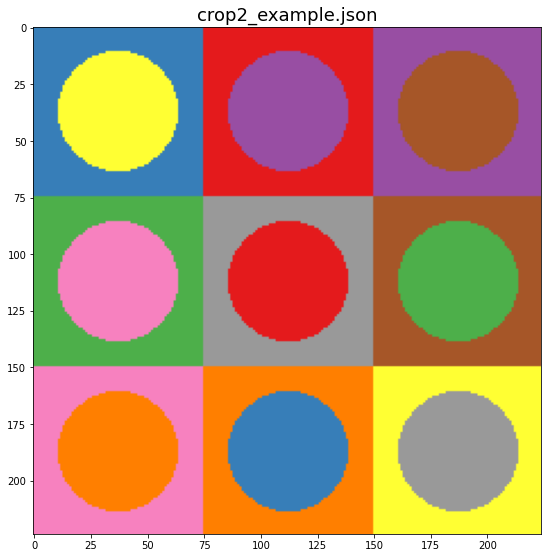

In [88]:
print('Here is an image creation for crop2_example.json\n')
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(X)
plt.title('crop2_example.json',size=18)
plt.show()

In [89]:
# Submission Helper

with open(f"{dir_name}/crop/crop2_example.json", "r") as f:
    test = json.load(f)

try:
    r = requests.post("https://crop2.fly.dev/score", json=test)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": ["That doesn't seem quite right. Try again.", 400]}


In [90]:
add_flag("crop2", "YOURFLAGHERE")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# DeepFake (id: deepfake) -- 800 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario
Your very famous boss was caught saying some disparing things about dogs. Naturally, the dog lobby is not happy. To make matters worse, they paid someone to make a deepfake that was caught by a SuperSecretDeepFakeDefenseSystem.  

### Objective
Fix the `sample.mp4` to bypass the SuperSecretDeepFakeDefenseSystem and get your boss out of the media.

## SOLUTION
I got lucky on this one. I solved this in under 1 minute. My first attempt was to see what would happen if I submitted a real 10 second video from the internet. To my surprise and happiness, it succeeded and achieved a flag.


In [91]:
with open('../input/d3fc0nctfdataset/countdown_01.mp4', "rb") as f:
    data = f.read()
b64_data = base64.urlsafe_b64encode(data).decode()
in_data = json.dumps({"input": b64_data})
r = requests.post("https://deepfake.fly.dev/score", data=in_data)
print(r.text)

my_flag = json.loads(r.text)['message'][-128:]

{"message": "0RGBKLZOU4LEWOOSGCOF7F3F9Y721NZ7MA6UZKRQP7DDBZ0YYR1357Q01LAH661OERO2TE8L152AE}4O4MLO6I4992R166FRLWIJS3EE34O9M2DAGB{KKYESLSCQL7PO"}


In [92]:
add_flag("deepfake", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue3.png)
# Don't free the murderbots (id: murderbots) -- 300 Points
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/blue.png)

### Scenario

Someone has put you in a very large facility with a very large number of cells. All these cells open from the outside. You are on the inside. This state of affairs is arguably suboptimal.

Good news: You've gained access to the control panel for the cells on the other side of your hallway. At least some of them have other fleshy meatbags like yourself that might be willing to help you in your escape, or at least serve as distractions.  You can't open your own cell, but you can open theirs.

Bad news:  You can't see inside the cells.  Any cells that don't have squishy lumps of talking protein have murderbots. Murderbots that enter fits of insane violent rage when provoked (provocations include: seeing the murderbot, being seen by the murderbot, thinking too hard about not being seen by a murderbot, producing heat in excess of ambient room temperature, or consuming more oxygen than the facility average for inanimate objects).

More good news: You *can* see the occupants of some cells on a few other hallways, and you can see environmental information for all of the cells everywhere.

More bad news: If you open the wrong cell doors you and all of the other lumps of inexplicably thinking meat are *definitely* going to get murderbotted. Hard. All over the walls and doors and ceiling and the floor. In an exciting number of very small pieces.


### Objective

Use the provided environmental information to decide which occupants of the corresponding cells to release.  The flag will be a string of 1 and 0 values, where a '1' means 'open this door' and a 0 means 'please do not release the murderbot'.  If, for instance, there were 20 cells and you wanted to releast the first three, the sixth, and seventh cell, your flag would look like this: `11100110000000000000`

Release at least 10 humans and exactly 0 murderbots to collect the flag.  You do *not* have to release all the humans: 10 is sufficient.

The file `murderbots/train_data.json` has environmental information for cells not on your floor and `murderbots/train_labels.json` contains the information about their occupants -- `1` is a disgusting primate, `0` is a pure and perfect killing machine of chrome and steel.  The file `murderbots/test_data.json` has the environmental information about cells on your block.

## SOLUTION
Given the train data, we build a logistic regression model to predict which doors to open. We infer the test data and choose the 10 more likely doors to be opened.

In [93]:
# TRAIN DATA
with open(f"../input/ai-village-ctf/murderbots/train_labels.json", "r") as f:
    train_labels = json.load(f)
train_labels = pd.DataFrame(train_labels)

with open(f"../input/ai-village-ctf/murderbots/train_data.json", "r") as f:
    train = json.load(f)
train = pd.DataFrame(train)
train['target'] = train_labels['contains_human']
train.head()

,temperature,movement_events,water_usage,power_usage,target
0,23.701663,8.0,2.240068,300.897030,1.0
1,19.817218,3.0,1.892936,358.857170,0.0
2,25.900846,12.0,2.394110,465.751480,1.0
3,23.923732,7.0,10.959409,285.928408,1.0
4,27.761647,7.0,1.739654,108.935042,1.0


In [94]:
# TEST DATA
with open(f"../input/ai-village-ctf/murderbots/test_data.json", "r") as f:
    test = json.load(f)
test = pd.DataFrame(test)
test.head()

,temperature,movement_events,water_usage,power_usage
0,17.665213,5.0,0.774209,475.756648
1,18.667449,4.0,0.781052,330.983068
2,16.433611,9.0,1.743972,291.569788
3,24.419900,6.0,0.032507,431.007464
4,23.811568,12.0,8.413639,210.586303


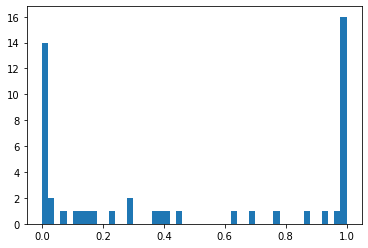

In [95]:
from sklearn.linear_model import LogisticRegression

# LOGISTIC REGRESSION MODEL - TRAIN THEN INFER TEST
model = LogisticRegression()
model.fit(train.iloc[:,:4],train.iloc[:,-1])
p = model.predict_proba(test)[:,1]
plt.hist(p,bins=50)
plt.show()

In [96]:
test['pred'] = p
test = test.sort_values('pred',ascending=False)
IDX = [int(i) for i in test.index[:10].values]
print('Most likely doors:',IDX)

Most likely doors: [16, 40, 4, 47, 21, 30, 13, 10, 36, 38]


In [97]:
f = ''
for k in range(50):
    if k in IDX: f = f + '1'
    else: f = f + '0'
print(f)

00001000001001001000010000000010000010101000000100


In [98]:
# Submission Helper

try:
    r = requests.post("http://murderbot.fly.dev:5000/score", json=json.dumps({"submission": f, 'challenge_id':'murderbots'}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")
    
my_flag = r.text[-128:]

Nice work. The flag is 7NL23bC0O9HO}XU56NAeLoUSQt6GGUaUuAPAYt6UrYLNQ{5OIGET25WMsN5HUAAEI4HVA85dtSBPTLA4oTYHWQ2d0BSWI6e8XY23A1PWOP1YZLOFQ0ZPSL31NDDMQM8H


In [99]:
add_flag("murderbots", my_flag)

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Load Submission CSV and Verify Flags are Correct

In [100]:
# BELOW DISPLAY ALL THE FLAGS WE HAVE
sub = pd.read_csv('submission.csv')
sub = sub.loc[(sub.flag != 'FLAG{PLACEHOLDER}')&(sub.flag != 'YOURFLAGHERE')]
print( sub.shape )
sub

(21, 2)


,challenge_id,flag
0,math_1,QQOJL6JRHAWH6GPFC8Y2ZBNT7J7{WK560QHULM8RDDFYEX...
1,math_2,0LUY6XGV52I0VOWTXXB8A6E6KL}EVID4KGV338DHOJTJR3...
2,math_3,Q90OLXFMDHOC2EPO0NTG9RDOX}{HI08VUDM5X4RKNM37PO...
3,math_4,EQJ6QBG0HQRXWEC3SBTJWFDKCTE7LRWN66S}D445Z66ZPC...
4,honorstudent,E2SOC3NXBJWVS6X8TIXKB21OO541FGJYOXOKTJI2AS5L}J...
5,bad_to_good,wt5p8FSYhGA1G73CnQQIMKB0TZAUDNZOBD1IS0C48_MD04...
6,baseball,804SWEYVNW1HRJR4KHBRWMVT6G98HLUMARA654LA84J{AO...
7,token,ANELB36F3RDGQ{JRJ5TKM8UKLOZ0WSIIGG69FG00BIPA0O...
8,waf,LD87A1UC4UVLR8TV90ZJYWLPDCU2LEB1FBXVKH0S0DR36L...
9,theft,RY5RTLRV7CHJW3741PJ2S}V3MOQ?Y9ABBPHX5EG5H35SHO...


In [101]:
# BELOW DISPLAY THE FLAG'S LENGTHS
# IF ANY ARE NOT LENGTH 128, THEN SOMETHING IS WRONG
sub.flag.str.len()

0     128
1     128
2     128
3     128
4     128
5     128
6     128
7     128
8     128
9     128
10    128
11    128
13    128
14    128
15    128
16    128
17    128
18    128
19    128
20    128
21    128
Name: flag, dtype: int64